# Machine Learning Advanced Nanodegree

## Capstone Project

<hr>

### <u>Table of contents</u>

* <a href="#Domain-Background">Domain Background</a>
* <a href="#Problem-Statement">Problem Statement</a> 
* <a href="#Data-Overview-and-Cleaning">Data Overview and Cleaning</a>
* <a href="#Exploratory-Analysis">Exploratory Analysis</a>
* <a href="#Feature-Engineering">Feature Engineering</a>
* <a href="#Vectorization">Vectorization</a>
* <a href="#Baseline-Model">Baseline Model</a>
* <a href="#Model-Application">Model Application</a>
* <a href="#Evaluation">Evaluation</a>

### <u>Domain Background</u>

My project draws upon the domain of document classification with an emphasis on the natural language processing component of document classification. Machine learning has been successfully used to classify documents by topic for several decades. However, machine learning techniques do not perform as well when performing sentiment analysis which requires the parsing of more complex language structures. This is where ideas from natural language processing must be applied. My aim with this project is to make progress towards solving a complex natural language processing problem using machine learning. I think that it would be very beneficial if computers could interpret and produce the same kind of natural language of which even young children are capable. This would allow machine learning to be applied to a wider variety of tasks than it is currently capable of solving. In particular, machine learning could be applied to many problems that are not well structured and for which there is not much training data.
This capstone project is based on the Toxic Comment Classification Challenge

Discussing things you care about can be difficult. The threat of abuse and harassment online means that many people stop expressing themselves and give up on seeking different opinions. Platforms struggle to effectively facilitate conversations, leading many communities to limit or completely shut down user comments.

The Conversation AI team, a research initiative founded by Jigsaw and Google (both a part of Alphabet) are working on tools to help improve online conversation. One area of focus is the study of negative online behaviors, like toxic comments (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion). So far they’ve built a range of publicly available models served through the Perspective API, including toxicity. But the current models still make errors, and they don’t allow users to select which types of toxicity they’re interested in finding (e.g. some platforms may be fine with profanity, but not with other types of toxic content).
With more people joining social media than ever before, it becomes imperative that this problem is solved. Classifying toxic comments (obscene, threat, insult, identity‒based hate) will be the core of this project.

### <u>Problem Statement</u>

In this project, I will build a multi‒headed model that will be capable of detecting different types of toxicity like threats, obscenity, insults, and identity‒based hate from a given comment. I’ll be using a dataset of comments from Wikipedia’s talk page edits. Improvements to the current models will hopefully help online discussion become more productive and respectful.

This is a supervised multi‒class classification problem and as such different measurable evaluation metrics could be applied. Given a comment, the solution will be a machine learning model that receives as input the comment and outputs either a class prediction or a class probabilty for every toxicity type.

### <u>Data Overview and Cleaning</u>

I’ll be using a dataset of comments from Wikipedia’s talk page edits which have been labeled by human raters for toxic behavior.
The types of toxicity are:

* toxic 
* severe toxic
* obscene
* threat
* insult 
* identity̲hate

#### Importing Data

In [116]:
local = 1

import numpy as np
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Styling

plt.style.use('ggplot')
sns.set_style('whitegrid')

if local:
    train = pd.read_csv("./data/train.csv")
    test = pd.read_csv("./data/test.csv")
else :
    train = pd.read_csv("./data/train.csv")
    test = pd.read_csv("./data/test.csv")

# Lets have a peek at our training data

display(HTML(train.sample(n = 5).to_html()))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
118238,77c87833e0dd1560,"oh, and armarkov, you fuck and are a cocksucker.",1,1,1,0,1,0
72029,c0d9baefec762346,Nationality. \n\nThere seems to be some disagr...,0,0,0,0,0,0
119126,7cd0e95430b93279,"""\n\nReadding information about your friend us...",0,0,0,0,0,0
6301,10d18fb3b4f86bef,"""\n\nAs posted at: http://en.wikipedia.org/wik...",0,0,0,0,0,0
112587,5a4efc97f34ee751,"Welcome!\n\nHello, Sdoust, and welcome to Wiki...",0,0,0,0,0,0


In [117]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


None

In [118]:
# Lets have a peek at our test data

display(HTML(test.sample(n = 5).to_html()))

,id,comment_text
145698,f38fa5b71b2dfa43,i found that instance of vandalism by looking ...
135899,e31efc34240aaa1d,no matter how sealed off from the world you ar...
121057,ca1fdd0bd5382466,== I LOVE THEM~ == \n\n i want to fuck all 4 o...
78128,825397189d032c69,""" \n\n == Replaceable fair use Image:Shakira2...."
63944,6a86449e6626fbe7,""" \n :::Oh im so sorry. I clicked the wrong li..."


In [119]:
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB


None

#### Data Set Overview

Our train and test data consists of 159571 and 153164 observations respectively. Both the train and test data do not have any null values. 😅 

In [120]:
# Lets create a separate dataframe to perform EDA on

def findClean(series):
    s = sum(series)
    if s == 0:
        return 1
    else:
        return 0
    
eda = train.copy()
eda["clean"] = eda.iloc[:,2:].apply(findClean, axis = 1)

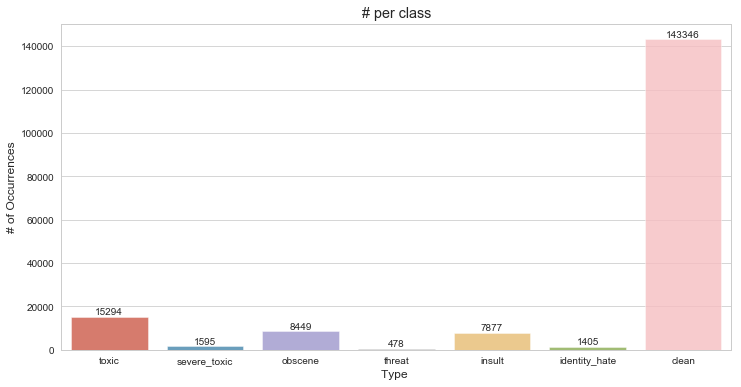

In [121]:
# Lets study class imbalance

x = eda.iloc[:, 2:].sum()
#plot
plt.figure(figsize = (12, 6))
ax = sns.barplot(x.index, x.values, alpha = 0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize = 12)
plt.xlabel('Type ', fontsize = 12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom')

plt.show()

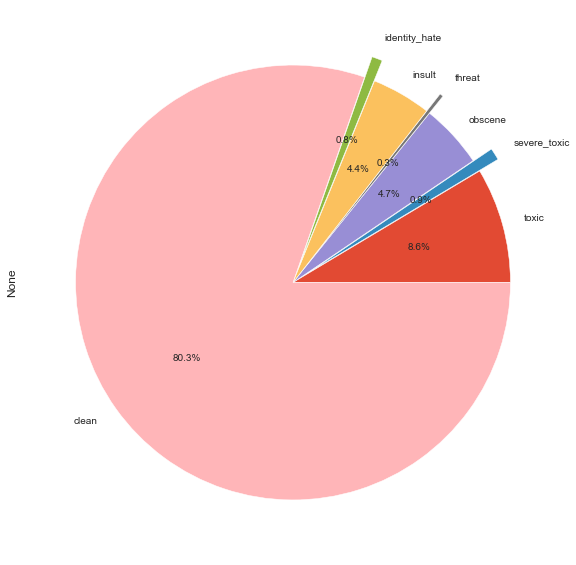

In [124]:
x.plot(kind = 'pie', explode = [0, 0.1, 0, 0.1, 0, 0.1, 0], figsize = (10, 10), autopct = '%1.1f%%', shadow = False)
plt.show()

The toxicity is not evenly spread out across classes. Hence we might face class imbalance problems

In [ ]:
# Lets create a wordcloud to see some common words in each type of toxicity category.